In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/banks-historical-stock-price/TRV.csv
/kaggle/input/banks-historical-stock-price/BK.csv
/kaggle/input/banks-historical-stock-price/AIG.csv
/kaggle/input/banks-historical-stock-price/MCO.csv
/kaggle/input/banks-historical-stock-price/COF-PG.csv
/kaggle/input/banks-historical-stock-price/WFC-PN.csv
/kaggle/input/banks-historical-stock-price/BMO.csv
/kaggle/input/banks-historical-stock-price/WFC-PO.csv
/kaggle/input/banks-historical-stock-price/C-PJ.csv
/kaggle/input/banks-historical-stock-price/WFC.csv
/kaggle/input/banks-historical-stock-price/TROW.csv
/kaggle/input/banks-historical-stock-price/TD.csv
/kaggle/input/banks-historical-stock-price/WFC-PR.csv
/kaggle/input/banks-historical-stock-price/MS-PK.csv
/kaggle/input/banks-historical-stock-price/TFC.csv
/kaggle/input/banks-historical-stock-price/WFC-PT.csv
/kaggle/input/banks-historical-stock-price/BAC-PB.csv
/kaggle/input/banks-historical-stock-price/BML-PG.csv
/kaggle/input/banks-historical-stock-price/MET.csv
/kaggle/

In [2]:
df = pd.read_csv('/kaggle/input/banks-historical-stock-price/AFL.csv')
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2006-01-03,23.370001,23.125000,23.325001,23.285000,3609200.0,16.394802
1,2006-01-04,23.459999,23.299999,23.350000,23.415001,4377000.0,16.486334
2,2006-01-05,23.665001,23.424999,23.455000,23.605000,3570200.0,16.620115
3,2006-01-06,24.575001,24.180000,24.450001,24.450001,4166400.0,17.215076
4,2006-01-09,24.700001,24.485001,24.514999,24.565001,3697800.0,17.296038


In [3]:
import os
import pandas as pd

data_dir = "/kaggle/input/banks-historical-stock-price/"  # replace with actual path
bank_data = {}

# Load only the 'Date' and 'Close' columns from each CSV file
for file in os.listdir(data_dir):
    if file.endswith(".csv"):
        bank_name = file.replace(".csv", "")
        df = pd.read_csv(os.path.join(data_dir, file), usecols=["Date", "Adj Close"])  # Select only the 'Date' and 'Close' columns
        df["Date"] = pd.to_datetime(df["Date"])  # Ensure Date column is in datetime format
        # Apply log transformation to the 'Adj Close' column
        df["Log_Adj_Close"] = np.log(df["Adj Close"])  # Log-transformed prices
        df = df.drop(columns=["Adj Close"])
        bank_data[bank_name] = df

# Example: To check the data of the first bank (print the first few rows)
print(bank_data[list(bank_data.keys())[0]].head())


        Date  Log_Adj_Close
0 2006-01-03       3.464019
1 2006-01-04       3.475047
2 2006-01-05       3.484678
3 2006-01-06       3.490200
4 2006-01-09       3.490624


In [4]:
for bank, df in bank_data.items():
    print(f"{bank}: {len(df)} rows")


TRV: 3749 rows
BK: 3749 rows
AIG: 3749 rows
MCO: 3749 rows
COF-PG: 1088 rows
WFC-PN: 2082 rows
BMO: 3749 rows
WFC-PO: 2018 rows
C-PJ: 1810 rows
WFC: 3749 rows
TROW: 3749 rows
TD: 3749 rows
WFC-PR: 1747 rows
MS-PK: 965 rows
TFC: 3749 rows
WFC-PT: 1601 rows
BAC-PB: 641 rows
BML-PG: 2122 rows
MET: 3749 rows
CME: 3749 rows
WFC-PX: 1121 rows
SPGI: 3749 rows
BLK: 3749 rows
COF: 3749 rows
WFC-PP: 1935 rows
WFC-PL: 2123 rows
GS-PD: 3656 rows
USB-PM: 2122 rows
LFC: 3749 rows
MS-PI: 1559 rows
MFC: 3749 rows
PYPL: 1358 rows
AFL: 3749 rows
USB-PH: 2122 rows
AON: 3749 rows
HSBC: 3749 rows
COF-PH: 1006 rows
BCS: 3749 rows
BRK-A: 3749 rows
ALL-PH: 330 rows
USB: 3749 rows
BML-PL: 2122 rows
ICE: 3749 rows
USB-PO: 1905 rows
MET-PA: 2122 rows
WFC-PV: 1311 rows
MSCI: 3278 rows
BAC-PK: 592 rows
CM: 3749 rows
MA: 3650 rows
MET-PE: 624 rows
UBS: 1505 rows
BAM: 3749 rows
BAC: 3749 rows
WFC-PQ: 1853 rows
PUK: 3749 rows
GS-PJ: 1912 rows
MS-PF: 1751 rows
SCHW-PD: 1191 rows
AXP: 3749 rows
ING: 3749 rows
PGR: 3749

In [5]:
# Filter out banks with fewer than 1000 rows
filtered_bank_data = {
    bank: df for bank, df in bank_data.items() if len(df) >= 2000
}


In [6]:
for bank, df in filtered_bank_data.items():
    print(f"{bank}: {len(df)} rows")

TRV: 3749 rows
BK: 3749 rows
AIG: 3749 rows
MCO: 3749 rows
WFC-PN: 2082 rows
BMO: 3749 rows
WFC-PO: 2018 rows
WFC: 3749 rows
TROW: 3749 rows
TD: 3749 rows
TFC: 3749 rows
BML-PG: 2122 rows
MET: 3749 rows
CME: 3749 rows
SPGI: 3749 rows
BLK: 3749 rows
COF: 3749 rows
WFC-PL: 2123 rows
GS-PD: 3656 rows
USB-PM: 2122 rows
LFC: 3749 rows
MFC: 3749 rows
AFL: 3749 rows
USB-PH: 2122 rows
AON: 3749 rows
HSBC: 3749 rows
BCS: 3749 rows
BRK-A: 3749 rows
USB: 3749 rows
BML-PL: 2122 rows
ICE: 3749 rows
MET-PA: 2122 rows
MSCI: 3278 rows
CM: 3749 rows
MA: 3650 rows
BAM: 3749 rows
BAC: 3749 rows
PUK: 3749 rows
AXP: 3749 rows
ING: 3749 rows
PGR: 3749 rows
MMC: 3749 rows
SCHW: 3749 rows
IBN: 3749 rows
BAC-PL: 3230 rows
PNC: 3749 rows
BNS: 3749 rows
HDB: 3749 rows
GS-PA: 2122 rows
MS: 3749 rows
JPM: 3749 rows
WBK: 3749 rows
BK-PC: 2060 rows
BAC-PE: 3172 rows
GS: 3749 rows
C: 3749 rows
RY: 3749 rows
CB: 3749 rows
BRK-B: 3749 rows
SMFG: 3732 rows
BX: 3380 rows
BML-PH: 2122 rows
MS-PA: 2122 rows


In [7]:
print(filtered_bank_data.keys())

dict_keys(['TRV', 'BK', 'AIG', 'MCO', 'WFC-PN', 'BMO', 'WFC-PO', 'WFC', 'TROW', 'TD', 'TFC', 'BML-PG', 'MET', 'CME', 'SPGI', 'BLK', 'COF', 'WFC-PL', 'GS-PD', 'USB-PM', 'LFC', 'MFC', 'AFL', 'USB-PH', 'AON', 'HSBC', 'BCS', 'BRK-A', 'USB', 'BML-PL', 'ICE', 'MET-PA', 'MSCI', 'CM', 'MA', 'BAM', 'BAC', 'PUK', 'AXP', 'ING', 'PGR', 'MMC', 'SCHW', 'IBN', 'BAC-PL', 'PNC', 'BNS', 'HDB', 'GS-PA', 'MS', 'JPM', 'WBK', 'BK-PC', 'BAC-PE', 'GS', 'C', 'RY', 'CB', 'BRK-B', 'SMFG', 'BX', 'BML-PH', 'MS-PA'])


In [8]:
# Check for missing values in the 'Close' column for each stock
missing_values = {bank: filtered_bank_data[bank]["Log_Adj_Close"].isna().sum() for bank in filtered_bank_data}

# Display the number of missing values for each stock
print(missing_values)

{'TRV': 0, 'BK': 0, 'AIG': 0, 'MCO': 0, 'WFC-PN': 0, 'BMO': 0, 'WFC-PO': 0, 'WFC': 0, 'TROW': 0, 'TD': 0, 'TFC': 0, 'BML-PG': 0, 'MET': 0, 'CME': 0, 'SPGI': 0, 'BLK': 0, 'COF': 0, 'WFC-PL': 0, 'GS-PD': 0, 'USB-PM': 0, 'LFC': 0, 'MFC': 0, 'AFL': 0, 'USB-PH': 0, 'AON': 0, 'HSBC': 0, 'BCS': 0, 'BRK-A': 0, 'USB': 0, 'BML-PL': 0, 'ICE': 0, 'MET-PA': 0, 'MSCI': 0, 'CM': 0, 'MA': 0, 'BAM': 0, 'BAC': 0, 'PUK': 0, 'AXP': 0, 'ING': 0, 'PGR': 0, 'MMC': 0, 'SCHW': 0, 'IBN': 0, 'BAC-PL': 0, 'PNC': 0, 'BNS': 0, 'HDB': 0, 'GS-PA': 0, 'MS': 0, 'JPM': 0, 'WBK': 0, 'BK-PC': 0, 'BAC-PE': 0, 'GS': 0, 'C': 0, 'RY': 0, 'CB': 0, 'BRK-B': 0, 'SMFG': 0, 'BX': 0, 'BML-PH': 0, 'MS-PA': 0}


In [9]:
import pandas as pd

# Initialize an empty DataFrame to hold the aligned time series
aligned_df = None

# Loop over each bank's DataFrame in the dictionary
for bank_name, df in filtered_bank_data.items():
    # Rename 'Log_Adj_Close' to the bank's name
    df_renamed = df.rename(columns={"Log_Adj_Close": bank_name})
    
    # Merge on 'Date' to align with existing data
    if aligned_df is None:
        aligned_df = df_renamed
    else:
        aligned_df = pd.merge(aligned_df, df_renamed, on="Date", how="inner")

# Set 'Date' as index for time series analysis
aligned_df.set_index("Date", inplace=True)

# Display first few rows of aligned time series data
print(aligned_df.head())


                 TRV        BK       AIG       MCO    WFC-PN       BMO  \
Date                                                                     
2012-11-15  4.036116  2.992949  3.286418  3.725248  2.787670  3.651258   
2012-11-16  4.040934  2.995915  3.304185  3.705664  2.797220  3.660169   
2012-11-19  4.053815  3.011445  3.322569  3.732197  2.799198  3.672443   
2012-11-20  4.055252  3.013525  3.323186  3.730681  2.801567  3.679633   
2012-11-21  4.063546  3.012693  3.331176  3.731548  2.805110  3.687958   

              WFC-PO       WFC      TROW        TD  ...    BAC-PE        GS  \
Date                                                ...                       
2012-11-15  2.790826  3.202061  3.899887  3.365541  ...  2.705431  4.624865   
2012-11-16  2.800117  3.213713  3.897203  3.367191  ...  2.702667  4.628324   
2012-11-19  2.802527  3.228012  3.915687  3.379670  ...  2.706809  4.649338   
2012-11-20  2.802928  3.243934  3.923725  3.386163  ...  2.704050  4.647561   
2012-11

In [10]:
print(type(filtered_bank_data))


<class 'dict'>


In [11]:
num_rows = aligned_df.shape[0]
print(f"Number of rows: {num_rows}")


Number of rows: 2018


In [12]:
from itertools import combinations

# Assuming `df` is your DataFrame where:
# - Rows are dates
# - Columns are log closing prices of 99 banks

# Step 1: Compute log returns
log_returns = aligned_df.diff().dropna()

# Step 2: Prepare storage for pairs with high correlation
high_corr_pairs = []

# Step 3: Generate all unique pairs and compute correlation
for stock1, stock2 in combinations(log_returns.columns, 2):
    corr = log_returns[stock1].corr(log_returns[stock2])
    if abs(corr) > 0.8:
        high_corr_pairs.append((stock1, stock2, corr))

# Step 4: Convert to DataFrame
high_corr_df = pd.DataFrame(high_corr_pairs, columns=['Stock A', 'Stock B', 'Correlation'])

# Optional: Sort by absolute correlation descending
high_corr_df['Abs Correlation'] = high_corr_df['Correlation'].abs()
high_corr_df = high_corr_df.sort_values(by='Abs Correlation', ascending=False).drop(columns='Abs Correlation')

# Display the result
print(high_corr_df)


   Stock A Stock B  Correlation
26   BRK-A   BRK-B     0.974472
2   WFC-PN  WFC-PO     0.930973
35     BAC     JPM     0.893496
15      TD      RY     0.891934
18     TFC     PNC     0.891112
14      TD     BNS     0.889799
16     TFC     USB     0.889763
3      BMO      TD     0.887092
45     JPM       C     0.886356
5      BMO     BNS     0.886160
4      BMO      CM     0.885064
28     USB     PNC     0.883006
37     BAC       C     0.881963
40     BNS      RY     0.881801
6      BMO      RY     0.875140
13      TD      CM     0.874168
31      CM     BNS     0.873718
38     PNC     JPM     0.873081
42      MS      GS     0.870681
29     USB     JPM     0.861567
8      WFC     USB     0.855934
32      CM      RY     0.852810
33     BAC     PNC     0.850994
0      TRV      CB     0.850216
19     TFC     JPM     0.846169
44     JPM      GS     0.841150
41      MS     JPM     0.840954
27     USB     BAC     0.840723
30     USB       C     0.839091
34     BAC      MS     0.837803
10     W

In [13]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

cointegrated_pairs = []

for _, row in high_corr_df.iterrows():
    stock1 = row['Stock A']
    stock2 = row['Stock B']
    
    # Drop NaNs and align both series on common dates
    x = aligned_df[stock1].dropna()
    y = aligned_df[stock2].dropna()
    common_index = x.index.intersection(y.index)
    x = x.loc[common_index]
    y = y.loc[common_index]
    
    # Skip if too few data points
    if len(x) < 100:
        continue
    
    # Regress y on x to get residuals
    x_const = sm.add_constant(x)
    model = sm.OLS(y, x_const).fit()
    residuals = model.resid

    # Apply ADF test to residuals
    adf_result = adfuller(residuals)
    p_value = adf_result[1]
    
    if p_value < 0.05:
        cointegrated_pairs.append((stock1, stock2, p_value))

# Create a DataFrame with cointegrated pairs
cointegrated_df = pd.DataFrame(cointegrated_pairs, columns=["Stock A", "Stock B", "ADF p-value"])
print(cointegrated_df)


   Stock A Stock B   ADF p-value
0    BRK-A   BRK-B  5.250136e-07
1   WFC-PN  WFC-PO  1.618109e-04
2      TFC     PNC  2.779052e-03
3      BMO      TD  8.594170e-03
4      BMO      CM  1.024446e-02
5      BAC       C  4.095242e-02
6       TD      CM  9.843314e-03
7       MS      GS  1.676473e-02
8       CM      RY  2.618622e-02
9      TRV      CB  7.813126e-03
10     JPM      GS  1.849404e-02
11     USB       C  2.510117e-02
12     PNC       C  4.614482e-02
13     MCO    SPGI  1.519618e-02
14     TFC       C  4.800439e-02
15     TFC     BAC  7.868180e-03
16     BAC      GS  2.750721e-02
17   GS-PD   GS-PA  5.409536e-03
18     MET     USB  2.898666e-02


In [14]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Parameters
window = 30  # Rolling window size for mean and std calculation

# List to store Z-scores for all pairs
z_scores = []

# Loop through each cointegrated pair and calculate the hedge ratio (n) and Z-score of the spread
for idx, row in cointegrated_df.iterrows():
    stock_a = row['Stock A']
    stock_b = row['Stock B']

    # Ensure both stocks exist in aligned_df
    if stock_a in aligned_df.columns and stock_b in aligned_df.columns:
        
        # Perform linear regression to calculate the hedge ratio (n)
        X = aligned_df[[stock_b]].dropna().values.reshape(-1, 1)
        y = aligned_df[stock_a].dropna().values

        # Fit linear regression model
        model = LinearRegression()
        model.fit(X, y)
        
        # Hedge ratio (n) is the slope of the regression line
        hedge_ratio = model.coef_[0]
        
        # Calculate the spread using the hedge ratio (n)
        aligned_df['Spread'] = aligned_df[stock_a] - hedge_ratio * aligned_df[stock_b]
        
        # Calculate rolling mean and standard deviation for the spread
        aligned_df['Spread_Mean'] = aligned_df['Spread'].rolling(window=window).mean()
        aligned_df['Spread_Std'] = aligned_df['Spread'].rolling(window=window).std()
        
        # Calculate the Z-score of the spread
        aligned_df['Spread_Z_Score'] = (aligned_df['Spread'] - aligned_df['Spread_Mean']) / aligned_df['Spread_Std']
        
        # Calculate the standard deviation of the Z-score over the rolling window
        z_score_volatility = aligned_df['Spread_Z_Score'].rolling(window=window).std().iloc[-1]
        
        # Store the pair and its Z-score volatility
        z_scores.append({
            'Stock A': stock_a,
            'Stock B': stock_b,
            'Z_Score_Volatility': z_score_volatility
        })

# Convert the list of Z-scores into a DataFrame for easier selection
z_scores_df = pd.DataFrame(z_scores)

# Select the pair with the highest Z-score volatility
selected_pair = z_scores_df.loc[z_scores_df['Z_Score_Volatility'].idxmax()]

print(f"Selected Pair for Pairs Trading: {selected_pair['Stock A']} and {selected_pair['Stock B']}")
print(f"Z-Score Volatility: {selected_pair['Z_Score_Volatility']}")


Selected Pair for Pairs Trading: MET and USB
Z-Score Volatility: 1.8119500856361028


In [15]:
price_MET = aligned_df['MET']
price_USB = aligned_df['USB']


In [16]:
print(aligned_df.columns)
print(price_MET.head())
print(price_USB.head())


Index(['TRV', 'BK', 'AIG', 'MCO', 'WFC-PN', 'BMO', 'WFC-PO', 'WFC', 'TROW',
       'TD', 'TFC', 'BML-PG', 'MET', 'CME', 'SPGI', 'BLK', 'COF', 'WFC-PL',
       'GS-PD', 'USB-PM', 'LFC', 'MFC', 'AFL', 'USB-PH', 'AON', 'HSBC', 'BCS',
       'BRK-A', 'USB', 'BML-PL', 'ICE', 'MET-PA', 'MSCI', 'CM', 'MA', 'BAM',
       'BAC', 'PUK', 'AXP', 'ING', 'PGR', 'MMC', 'SCHW', 'IBN', 'BAC-PL',
       'PNC', 'BNS', 'HDB', 'GS-PA', 'MS', 'JPM', 'WBK', 'BK-PC', 'BAC-PE',
       'GS', 'C', 'RY', 'CB', 'BRK-B', 'SMFG', 'BX', 'BML-PH', 'MS-PA',
       'Spread', 'Spread_Mean', 'Spread_Std', 'Spread_Z_Score'],
      dtype='object')
Date
2012-11-15    3.065721
2012-11-16    3.072716
2012-11-19    3.087186
2012-11-20    3.098366
2012-11-21    3.112473
Name: MET, dtype: float64
Date
2012-11-15    3.226109
2012-11-16    3.236944
2012-11-19    3.253603
2012-11-20    3.258889
2012-11-21    3.252667
Name: USB, dtype: float64


/tmp/ipykernel_31/3569549341.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta = model.params[1]
/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)


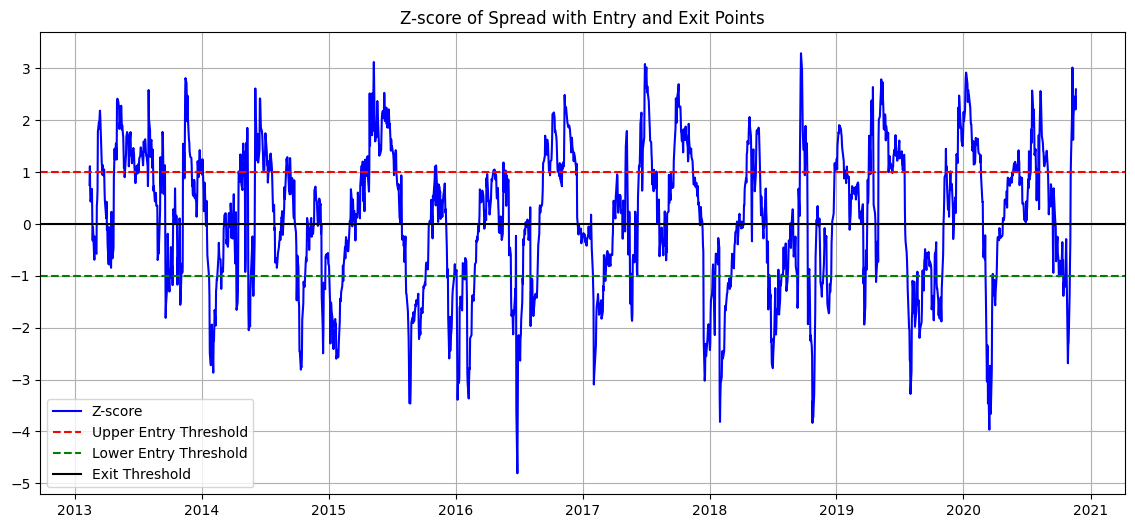

Date
2012-11-15    0
2012-11-16    0
2012-11-19    0
2012-11-20    0
2012-11-21    0
2012-11-23    0
2012-11-26    0
2012-11-27    0
2012-11-28    0
2012-11-29    0
Name: Trading Signal, dtype: int64


In [17]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Assume aligned_df contains your data
# Select two stock price series
price_MET = aligned_df['MET']
price_USB = aligned_df['USB']

# Step 1: Linear Regression to find hedge ratio (beta)
X = sm.add_constant(price_USB)
model = sm.OLS(price_MET, X).fit()
beta = model.params[1]

# Step 2: Compute Spread
spread = price_MET - beta * price_USB

# Step 3: Compute Z-score of the spread
def compute_zscore(series, window=60):
    mean = series.rolling(window).mean()
    std = series.rolling(window).std()
    zscore = (series - mean) / std
    return zscore

zscore = compute_zscore(spread)

# Step 4: Generate Trading Signals
def generate_signals(zscore, entry_threshold=1.0, exit_threshold=0.0):
    signal = pd.Series(index=zscore.index, data=0)

    # Entry conditions
    signal[zscore < -entry_threshold] = 1   # Long MET, Short USB
    signal[zscore > entry_threshold] = -1   # Short MET, Long USB

    # Exit condition
    signal[(zscore < exit_threshold) & (zscore > -exit_threshold)] = 0

    return signal.ffill().fillna(0)

signals = generate_signals(zscore)

# Step 5: Plot the Z-score with entry/exit lines
plt.figure(figsize=(14, 6))
plt.plot(zscore, label='Z-score', color='blue')
plt.axhline(1.0, color='red', linestyle='--', label='Upper Entry Threshold')
plt.axhline(-1.0, color='green', linestyle='--', label='Lower Entry Threshold')
plt.axhline(0, color='black', linestyle='-', label='Exit Threshold')
plt.title('Z-score of Spread with Entry and Exit Points')
plt.legend()
plt.grid(True)
plt.show()

# Step 6: Optional - Print some of the signals
signals.name = 'Trading Signal'
print(signals.head(10))


In [18]:
import pandas as pd
import numpy as np

# Example: Assume you already have zscore and spread DataFrames
# zscore: Series with Z-score between pair MET and USB
# spread: Difference between log prices of MET and USB
# signals: Already created signal series with 1 (long), -1 (short), 0 (no trade)

# Constants
initial_capital = 100000
capital_per_trade = 10000
max_holding_days = 10
z_stop_loss = 3.0
entry_threshold = 1.0
exit_threshold = 0.1

# Initialize
signals = pd.Series(index=zscore.index, data=0)
positions = pd.DataFrame(index=zscore.index, columns=["MET", "USB"])
trade_entry_dates = []
capital_used = 0
in_trade = False
holding_days = 0

for date in zscore.index:
    z = zscore.loc[date]

    # Check if in trade
    if in_trade:
        holding_days += 1

        # Exit Conditions
        if abs(z) < exit_threshold or abs(z) > z_stop_loss or holding_days > max_holding_days:
            signals.loc[date] = 0  # Exit
            in_trade = False
            holding_days = 0
            capital_used = 0
        else:
            signals.loc[date] = current_signal  # Continue trade
    else:
        # Entry Conditions
        if z > entry_threshold and capital_used + capital_per_trade <= initial_capital:
            current_signal = -1  # Short MET, Long USB
            signals.loc[date] = current_signal
            in_trade = True
            capital_used += capital_per_trade
            holding_days = 1
        elif z < -entry_threshold and capital_used + capital_per_trade <= initial_capital:
            current_signal = 1  # Long MET, Short USB
            signals.loc[date] = current_signal
            in_trade = True
            capital_used += capital_per_trade
            holding_days = 1
        else:
            signals.loc[date] = 0

# Position Sizing: Allocate ₹5000 to each leg
positions["MET"] = signals * (capital_per_trade / 2)
positions["USB"] = -signals * (capital_per_trade / 2)  # Opposite position

print("Final Trading Signals:")
print(signals[signals != 0].head())

print("\nPosition Sizing (first few rows):")
print(positions.dropna().head())


Final Trading Signals:
Date
2013-02-13   -1
2013-02-14   -1
2013-02-15   -1
2013-02-19   -1
2013-03-08   -1
dtype: int64

Position Sizing (first few rows):
            MET  USB
Date                
2012-11-15  0.0  0.0
2012-11-16  0.0  0.0
2012-11-19  0.0  0.0
2012-11-20  0.0  0.0
2012-11-21  0.0  0.0


In [19]:
# Print the 'signals' Series
print("Signals:")
print(signals.head())  # or print(signals) to see the full series

# Print the 'positions' DataFrame
print("\nPositions:")
print(positions.head())  # or print(positions) to see the full DataFrame


Signals:
Date
2012-11-15    0
2012-11-16    0
2012-11-19    0
2012-11-20    0
2012-11-21    0
dtype: int64

Positions:
            MET  USB
Date                
2012-11-15  0.0  0.0
2012-11-16  0.0  0.0
2012-11-19  0.0  0.0
2012-11-20  0.0  0.0
2012-11-21  0.0  0.0


In [27]:
# Importing the necessary library
import yfinance as yf

# Define the stock symbols and date range
stocks = ['MET', 'USB']
start_date = '2016-04-01'
end_date = '2019-07-31'

# Download the historical data from Yahoo Finance
historical_data = yf.download(stocks, start=start_date, end=end_date)['Adj Close']

# Display the first few rows of the data to verify
historical_data.head()


[*********************100%***********************]  2 of 2 completed


Ticker,MET,USB
Date,,


Empty DataFrame
Columns: [MET, USB]
Index: []
Data Shape: (0, 2)
Missing Values: Ticker
MET    0
USB    0
dtype: int64


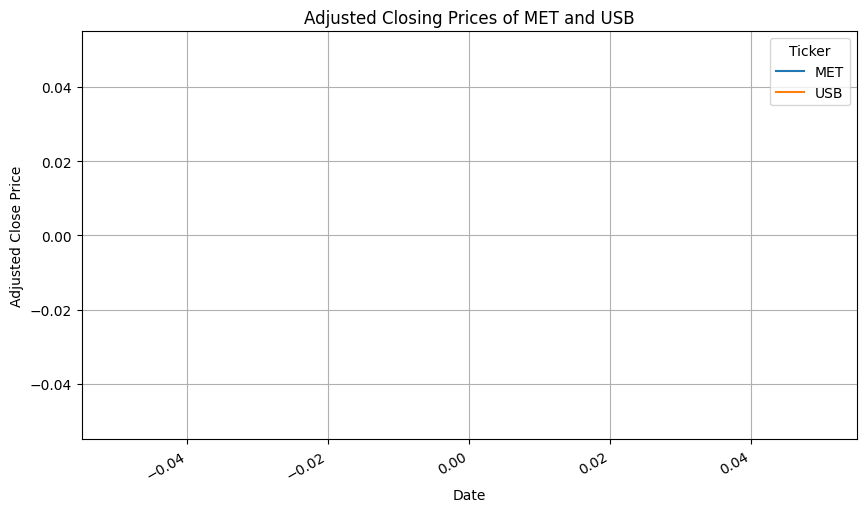

In [23]:
# Check the first few rows of the historical data to ensure it's downloaded correctly
print(historical_data.head())

# Check the shape of the DataFrame
print(f"Data Shape: {historical_data.shape}")

# Check for missing values
print("Missing Values:", historical_data.isnull().sum())

# Plot the stock data to visually inspect
import matplotlib.pyplot as plt

historical_data.plot(figsize=(10, 6))
plt.title('Adjusted Closing Prices of MET and USB')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.grid(True)
plt.show()


In [28]:
# Try downloading data for a single stock (e.g., AAPL)
historical_data_aapl = yf.download('AAPL', start='2022-04-01', end='2023-03-31')['Adj Close']
print(historical_data_aapl.head())


[*********************100%***********************]  1 of 1 completed

Empty DataFrame
Columns: [AAPL]
Index: []


In [29]:
# Select the pair with the highest Z-score volatility
best_pair = z_scores_df.loc[z_scores_df['Z_Score_Volatility'].idxmax()]

# Remove the best pair from the list to focus on the second-best pair
z_scores_df = z_scores_df[z_scores_df['Stock A'] != best_pair['Stock A']]
z_scores_df = z_scores_df[z_scores_df['Stock B'] != best_pair['Stock B']]

# Select the pair with the second-highest Z-score volatility
second_best_pair = z_scores_df.loc[z_scores_df['Z_Score_Volatility'].idxmax()]

# Print the second-best pair and its Z-score volatility
print(f"Second-Best Pair for Pairs Trading: {second_best_pair['Stock A']} and {second_best_pair['Stock B']}")
print(f"Z-Score Volatility: {second_best_pair['Z_Score_Volatility']}")


Second-Best Pair for Pairs Trading: BAC and C
Z-Score Volatility: 1.67279313930304


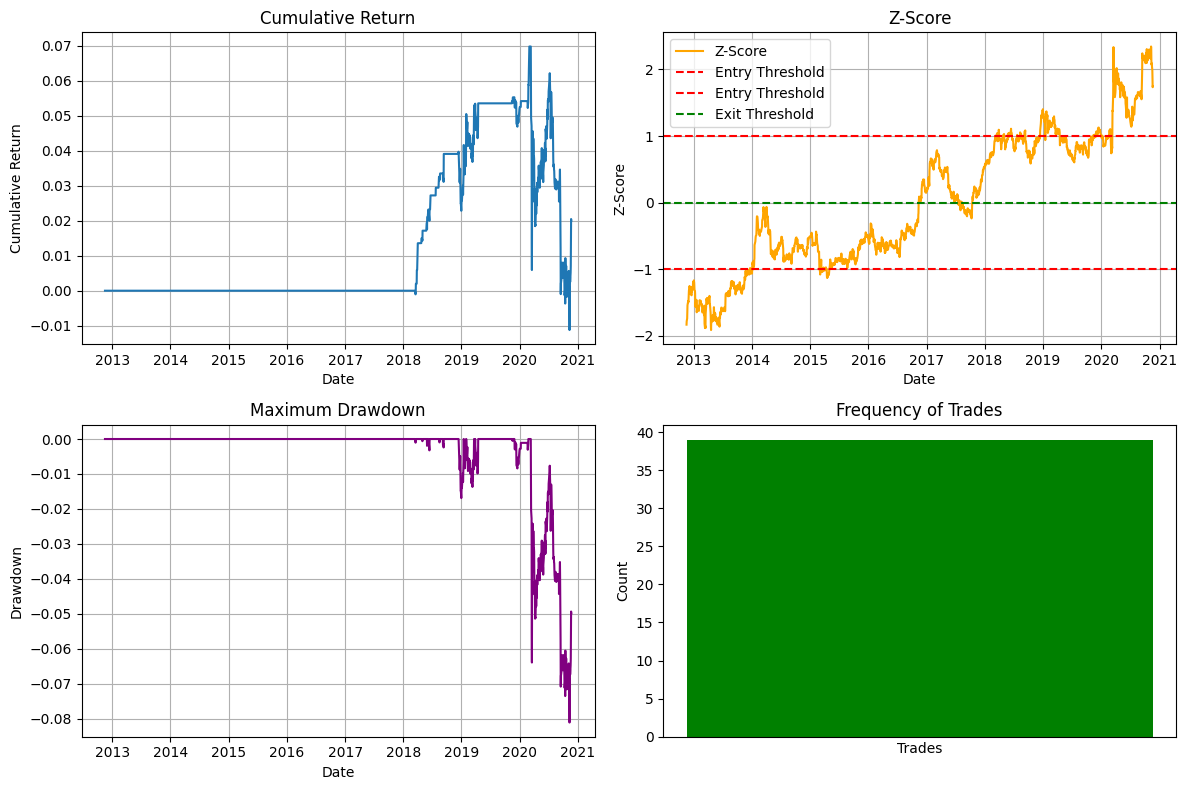

Cumulative Return: 0.0200
Annualized Sharpe Ratio: 0.1082
Maximum Drawdown: -0.0811
Frequency of Trades Placed: 39.0


/tmp/ipykernel_31/534262688.py:92: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Cumulative Return: {cumulative_return[-1]:.4f}")


In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore

# Assuming aligned_df contains the adjusted closing prices for multiple banks
# Extract BAC and C data from the aligned_df DataFrame
data = aligned_df[['BAC', 'C']]

# Step 1: Calculate the spread between BAC and C
spread = data['BAC'] - data['C']

# Step 2: Calculate Z-Score for the spread
z_scores = zscore(spread)
z_scores = pd.Series(z_scores, index=spread.index)

# Define the entry and exit thresholds
entry_threshold = 1.0  # Buy if z-score > 1 or < -1
exit_threshold = 0.0   # Exit when z-score crosses 0

# Step 3: Generate signals for entry and exit
signals = pd.Series(0, index=z_scores.index)  # Default no signal
signals[z_scores > entry_threshold] = -1  # Short BAC and buy C
signals[z_scores < -entry_threshold] = 1  # Buy BAC and short C
signals[z_scores < exit_threshold] = 0  # Exit position

# Step 4: Calculate daily returns for BAC and C
returns_bac = data['BAC'].pct_change()
returns_c = data['C'].pct_change()

# Define position and strategy returns
positions = signals.shift(1)  # To avoid lookahead bias
strategy_returns = positions * (returns_bac - returns_c)  # Long BAC, short C

# Step 5: Calculate Cumulative Return
cumulative_return = (1 + strategy_returns).cumprod() - 1

# Step 6: Calculate Annualized Sharpe Ratio (Assuming risk-free rate = 0)
sharpe_ratio = np.sqrt(252) * strategy_returns.mean() / strategy_returns.std()

# Step 7: Calculate Maximum Drawdown
cumulative_max = cumulative_return.cummax()
drawdown = cumulative_return - cumulative_max
max_drawdown = drawdown.min()

# Step 8: Calculate Frequency of Trades Placed
trade_frequency = signals.diff().abs().sum()

# Step 9: Plot the Results
plt.figure(figsize=(12, 8))

# Cumulative Return Plot
plt.subplot(2, 2, 1)
plt.plot(cumulative_return, label='Cumulative Return')
plt.title('Cumulative Return')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.grid(True)

# Z-Score Plot
plt.subplot(2, 2, 2)
plt.plot(z_scores, label='Z-Score', color='orange')
plt.axhline(entry_threshold, linestyle='--', color='red', label='Entry Threshold')
plt.axhline(-entry_threshold, linestyle='--', color='red', label='Entry Threshold')
plt.axhline(0, linestyle='--', color='green', label='Exit Threshold')
plt.title('Z-Score')
plt.xlabel('Date')
plt.ylabel('Z-Score')
plt.grid(True)
plt.legend()

# Drawdown Plot
plt.subplot(2, 2, 3)
plt.plot(drawdown, label='Drawdown', color='purple')
plt.title('Maximum Drawdown')
plt.xlabel('Date')
plt.ylabel('Drawdown')
plt.grid(True)

# Frequency of Trades Plot
plt.subplot(2, 2, 4)
plt.bar([1], [trade_frequency], color='green')
plt.title('Frequency of Trades')
plt.xlabel('Trades')
plt.ylabel('Count')
plt.xticks([])

plt.tight_layout()
plt.show()

# Step 10: Print Evaluation Metrics
print(f"Cumulative Return: {cumulative_return[-1]:.4f}")
print(f"Annualized Sharpe Ratio: {sharpe_ratio:.4f}")
print(f"Maximum Drawdown: {max_drawdown:.4f}")
print(f"Frequency of Trades Placed: {trade_frequency}")
